In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, backend
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import IPython.display as display
import pathlib

In [5]:
def unet():
    inputs = tf.keras.Input(shape=(256, 256, 4), name="img")

    # 3x3x3 conv
    precontext1 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same")(inputs)

    # context module 1 
    # context module = conv2d 3x3x3 + droput(0.3) + conv2d 3x3x3
    context1 = tf.keras.layers.BatchNormalization()(precontext1)
    context1 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same")(context1)
    context1 = tf.keras.layers.Dropout(0.3)(context1)
    context1 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same")(context1)
    # context1 = tf.keras.layers.LeakyReLU(alpha=0.1)(context1)


    # combine pre-context and post-context
    net1 = tf.keras.layers.Add()([precontext1, context1])
    copy1 = net1

    # downsample 1 using stride instead of max2d
    precontext2 = tf.keras.layers.BatchNormalization()(net1)
    precontext2 = tf.keras.layers.Conv2D(32, (3,3), strides=(2,2), activation="relu", padding="same")(precontext2)
    # precontext2 = tf.keras.layers.LeakyReLU(alpha=0.1)(precontext2)


    # context module 2 
    # context module = conv2d 3x3x3 + droput(0.3) + conv2d 3x3x3
    context2 = tf.keras.layers.BatchNormalization()(precontext2)
    context2 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(context2)
    context2 = tf.keras.layers.Dropout(0.3)(context2)
    context2 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(context2)
    # context2 = tf.keras.layers.LeakyReLU(alpha=0.1)(context2)



    # combine pre-context and post-context
    net2 = tf.keras.layers.Add()([precontext2, context2])
    copy2 = net2

    # downsample 2 using stride instead of max2d
    precontext3 = tf.keras.layers.BatchNormalization()(net2)
    precontext3 = tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), activation="relu", padding="same")(precontext3)
    # precontext3 = tf.keras.layers.LeakyReLU(alpha=0.1)(precontext3)

    # context module 3
    # context module = conv2d 3x3x3 + droput(0.3) + conv2d 3x3x3
    context3 = tf.keras.layers.BatchNormalization()(precontext3)
    context3 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same")(context3)
    context3 = tf.keras.layers.Dropout(0.3)(context3)
    context3 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same")(context3)
    context3 = tf.keras.layers.LeakyReLU(alpha=0.1)(context3)



    # combine pre-context and post-context
    net3 = tf.keras.layers.Add()([precontext3, context3])
    copy3 = net3


    # downsample 3 using stride instead of max2d
    precontext4 = tf.keras.layers.BatchNormalization()(net3)
    precontext4 = tf.keras.layers.Conv2D(128, (3,3), strides=(2,2), activation="relu", padding="same")(precontext4)
    # precontext4 = tf.keras.layers.LeakyReLU(alpha=0.1)(precontext4)



    # context module 4
    # context module = conv2d 3x3x3 + droput(0.3) + conv2d 3x3x3
    context4 = tf.keras.layers.BatchNormalization()(precontext4)
    context4 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same")(context4)
    context4 = tf.keras.layers.Dropout(0.3)(context4)
    context4 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same")(context4)
    # context4 = tf.keras.layers.LeakyReLU(alpha=0.1)(context4)



    # combine pre-context and post-context
    net4 = tf.keras.layers.Add()([precontext4, context4])
    copy4 = net4

    # downsample 4 using stride instead of max2d
    precontext5 = tf.keras.layers.BatchNormalization()(net4)
    precontext5 = tf.keras.layers.Conv2D(256, (3,3), strides=(2,2), activation="relu", padding="same")(precontext5)
    # precontext5 = tf.keras.layers.LeakyReLU(alpha=0.1)(precontext5)



    # context module 5
    # context module = conv2d 3x3x3 + droput(0.3) + conv2d 3x3x3
    context5 = tf.keras.layers.BatchNormalization()(precontext5)
    context5 = tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same")(context5)
    context5 = tf.keras.layers.Dropout(0.3)(context5)
    context5 = tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same")(context5)
    context5 = tf.keras.layers.LeakyReLU(alpha=0.1)(context5)



    # combine pre-context and post-context
    net5 = tf.keras.layers.Add()([precontext5, context5])

    # upsample 1
    # upsample module = upsample2d + conv2d
    upsample1 = tf.keras.layers.UpSampling2D()(net5)
    upsample1 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same")(upsample1)
    # upsample1 = tf.keras.layers.LeakyReLU(alpha=0.1)(upsample1)


    # concat copy4 and upsample1
    prelocal1 = tf.keras.layers.concatenate([copy4, upsample1])


    # localization module 1
    # localization module = conv2d 3x3x3 + conv2d 1x1x1
    local1 = tf.keras.layers.BatchNormalization()(prelocal1)
    local1 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same")(local1)
    local1 = tf.keras.layers.Conv2D(128, (1,1), activation="relu", padding="same")(local1)
    # local1 = tf.keras.layers.LeakyReLU(alpha=0.01)(local1)

    # upsample 2
    # upsample module = upsample2d + conv2d
    upsample2 = tf.keras.layers.UpSampling2D()(local1)
    upsample2 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same")(upsample2)
    # upsample2 = tf.keras.layers.LeakyReLU(alpha=0.01)(upsample2)


    # concat copy3 and upsample2
    prelocal2 = tf.keras.layers.concatenate([copy3, upsample2])


    # localization module 2
    # localization module = conv2d 3x3x3 + conv2d 1x1x1
    local2 = tf.keras.layers.BatchNormalization()(prelocal2)
    local2 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same")(local2)
    local2 = tf.keras.layers.Conv2D(64, (1,1), activation="relu", padding="same")(local2)
    local2 = tf.keras.layers.LeakyReLU(alpha=0.01)(local2)


    # segmentation 1/upscale
    seg1 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(local2)
    seg1 = tf.keras.layers.UpSampling2D()(seg1)


    # upsample 3
    # upsample module = upsample2d + conv2d
    upsample3 = tf.keras.layers.UpSampling2D()(local2)
    upsample3 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(upsample3)
    # upsample3 = tf.keras.layers.LeakyReLU(alpha=0.01)(upsample3)


    # concat copy2 and upsample3
    prelocal3 = tf.keras.layers.concatenate([copy2, upsample3])


    # localization module 3
    # localization module = conv2d 3x3x3 + conv2d 1x1x1
    local3 = tf.keras.layers.BatchNormalization()(prelocal3)
    local3 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(local3)
    local3 = tf.keras.layers.Conv2D(32, (1,1), activation="relu", padding="same")(local3)
    # local3 = tf.keras.layers.LeakyReLU(alpha=0.01)(local3)



    # segmentation 2/upscale
    seg2 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(local3)
    # seg2 = tf.keras.layers.UpSampling2D()(seg2)


    # combine seg1 and seg2
    seg1_2 = tf.keras.layers.Add()([seg1, seg2])
    seg1_2 = tf.keras.layers.UpSampling2D()(seg1_2)



    # upsample 4
    # upsample module = upsample2d + conv2d
    upsample4 = tf.keras.layers.UpSampling2D()(local3)
    upsample4 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same")(upsample4)
    # upsample4 = tf.keras.layers.LeakyReLU(alpha=0.01)(upsample4)


    # concat copy1 and upsample4
    pre_final = tf.keras.layers.concatenate([copy1, upsample4])
    pre_final = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(pre_final)


    # segmentation 3
    pre_final = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(pre_final)
    seg_final = tf.keras.layers.Add()([pre_final, seg1_2])


    outputs = tf.keras.layers.Conv2D(4, 1, activation="softmax")(seg_final)
    model = tf.keras.Model(inputs, outputs, name="unet")
    return model

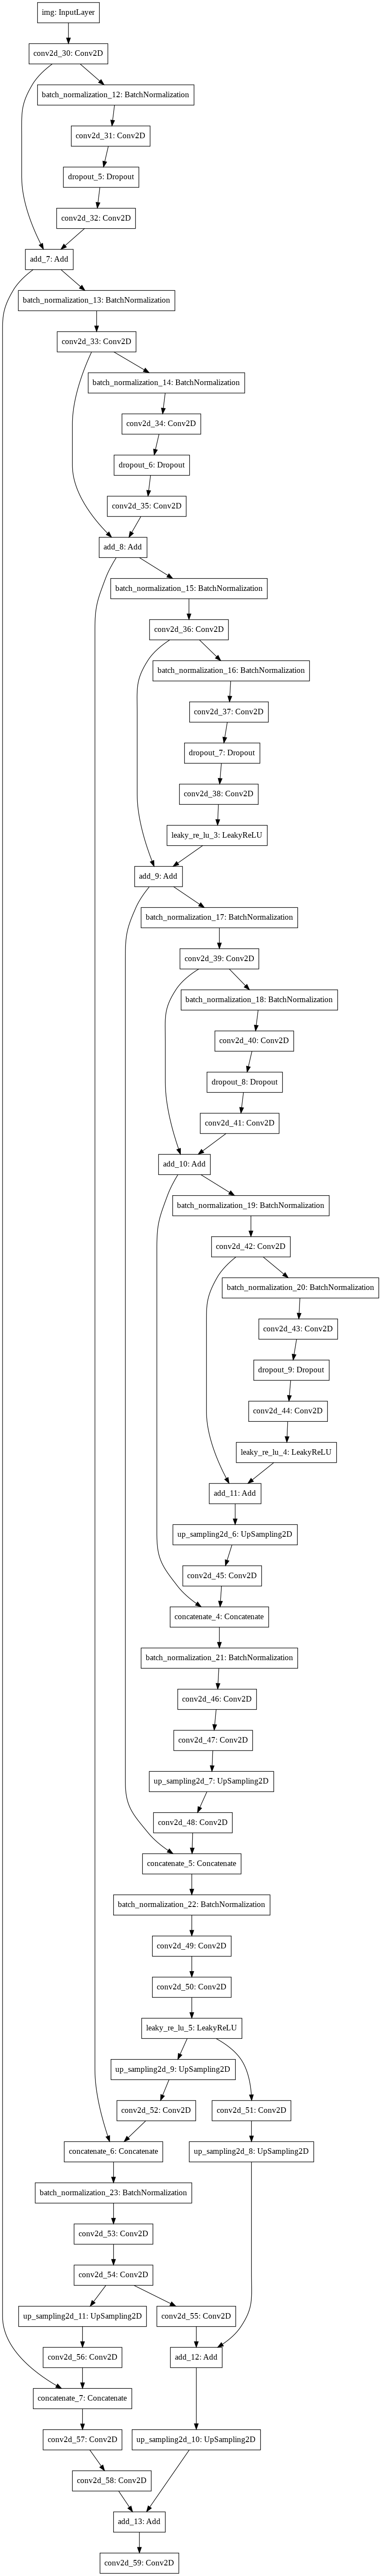

In [6]:
model = unet()
tf.keras.utils.plot_model(model)

In [7]:
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = tf.keras.backend.batch_flatten(y_true)
    y_pred_f = tf.keras.backend.batch_flatten(y_pred)

    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    sums = tf.keras.backend.sum(tf.keras.backend.square(y_true_f)) + tf.keras.backend.sum(tf.keras.backend.square(y_pred_f))

    return (2.0 * intersection + smooth) / (sums + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [8]:
def get_a_palette(img):
    list0 = get_arr_list(img)
    palette = get_palette(list0)
    return palette

# img.shape = (256,256,4)
def get_arr_list(img):
    list0= []
    for i in range(256):
        for j in range(256):
            list0.append(img[i,j,:].tolist())
    return list0

def uniq(lst):
    last = object()
    for item in lst:
        if item == last:
            continue
        yield item
        last = item


def sort_and_deduplicate(l):
    return list(uniq(sorted(l, reverse=True)))

def get_palette(lst):
    palette = sort_and_deduplicate(lst)
    return palette

def decode_img(img):
    img = tf.image.decode_png(img, channels=4) #color images
#     img / 255.0
    img = tf.image.convert_image_dtype(img, tf.float32)
    #convert unit8 tensor to floats in the [0,1]range
    return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT]) 
    #resize the image into 32*32 
    

def ohm(palette, img):
    one_hot_map = []
    for colour in palette:
        class_map = tf.reduce_all(tf.equal(img, colour), axis=-1)
        one_hot_map.append(class_map)
    one_hot_map = tf.stack(one_hot_map, axis=-1)
    one_hot_map = tf.cast(one_hot_map, tf.float32)
    return one_hot_map


#  both paths are to an image
def map_fn(image_path, label_path):
    # Load the raw data from the file as a string.
    img = tf.io.read_file(image_path)
    # Convert the compressed string to a 3D uint8 tensor.
    img = tf.image.decode_png(img, channels=4) # channels=3 for RGB, channels=1 for grayscale
    # Resize the image to the desired size.
    img = tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT]) 
    # Standardise values to be in the [0, 1] range.
    img = tf.cast(img, tf.float32) / 255.0
    # One-hot encode the label.
    label1 = tf.io.read_file(label_path)
    label2 = decode_img(label1)
    one_hot = ohm(palette, label2)
    # Return the processed image and label.
    return img, one_hot